# MATH 210 Introduction to Mathematical Computing

## March 31, 2017

* Wind data example:
  * Parsing dates with datetime object
  * Use .map to manipulate a dataframe
  * Use dataframe methods: .mean, .max, .min, etc...
  * Groupby
  * More plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## Wind data from the Vancouver Airport

Vancouver weather data is available on [Environment Canada's webpage](http://climate.weather.gc.ca/) but it's clearly complied on [vancouver.weatherstats.ca](https://vancouver.weatherstats.ca/)

In [10]:
weather = pd.read_csv("http://www.math.ubc.ca/~pwalls/data/weatherstats_vancouver_hourly.csv"
                      ,usecols=[0,2,4,6,10],parse_dates=[0])

In [11]:
weather.head()

,date_time_local,pressure_station,wind_dir,wind_speed,temperature
0,2017-03-31 12:00:00,102.85,E,20,9.4
1,2017-03-31 11:00:00,102.85,ESE,22,8.9
2,2017-03-31 10:00:00,102.85,E,23,8.0
3,2017-03-31 09:00:00,102.85,E,19,7.7
4,2017-03-31 08:00:00,102.85,E,17,6.6


In [12]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
date_time_local     50000 non-null datetime64[ns]
pressure_station    50000 non-null float64
wind_dir            49633 non-null object
wind_speed          50000 non-null int64
temperature         50000 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 1.9+ MB


In [13]:
pd.datetime?

In [14]:
right_now = pd.datetime(2017,3,31,2,15,0)

In [15]:
type(right_now)

datetime.datetime

In [16]:
right_now.year

2017

In [17]:
right_now.day

31

In [20]:
weather['Year'] = weather['date_time_local'].map(lambda d:d.year)
weather['Month'] = weather['date_time_local'].map(lambda d:d.month)
weather['Day'] = weather['date_time_local'].map(lambda d:d.day)
weather['Hour'] = weather['date_time_local'].map(lambda d:d.hour)

In [21]:
weather.head()

,date_time_local,pressure_station,wind_dir,wind_speed,temperature,Year,Month,Day,Hour
0,2017-03-31 12:00:00,102.85,E,20,9.4,2017,3,31,12
1,2017-03-31 11:00:00,102.85,ESE,22,8.9,2017,3,31,11
2,2017-03-31 10:00:00,102.85,E,23,8.0,2017,3,31,10
3,2017-03-31 09:00:00,102.85,E,19,7.7,2017,3,31,9
4,2017-03-31 08:00:00,102.85,E,17,6.6,2017,3,31,8


In [22]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
date_time_local     50000 non-null datetime64[ns]
pressure_station    50000 non-null float64
wind_dir            49633 non-null object
wind_speed          50000 non-null int64
temperature         50000 non-null float64
Year                50000 non-null int64
Month               50000 non-null int64
Day                 50000 non-null int64
Hour                50000 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 3.4+ MB


### Predominant wind direction by month

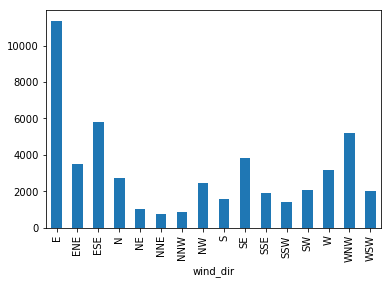

In [23]:
weather.groupby('wind_dir').size().plot(kind='bar')

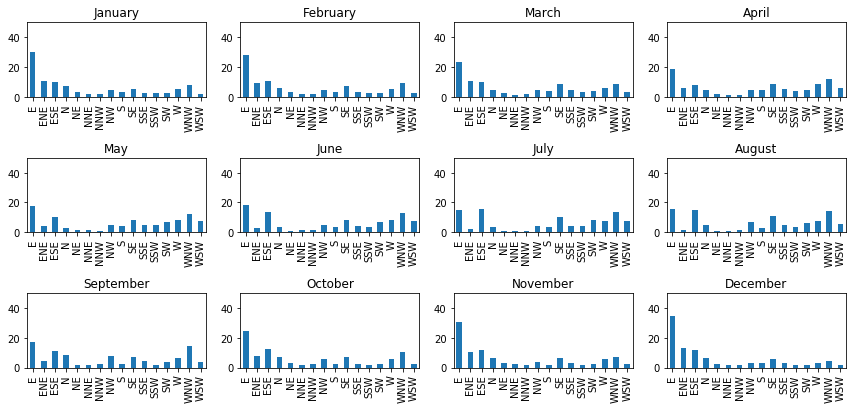

In [29]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(12,6))
plt.subplot(3,4,1)
for month in range(1,13):
    plt.subplot(3,4,month)
    wind_directions = weather[weather['Month'] == month].groupby('wind_dir').size()
    wind_directions = wind_directions / wind_directions.sum() * 100
    wind_directions.plot(kind='bar')
    plt.tight_layout()
    plt.title(months[month - 1]),plt.xlabel(''),plt.ylim([0,50])

### Wind speed diurnal patters

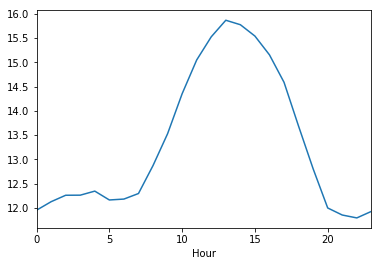

In [30]:
weather.groupby('Hour')['wind_speed'].mean().plot()

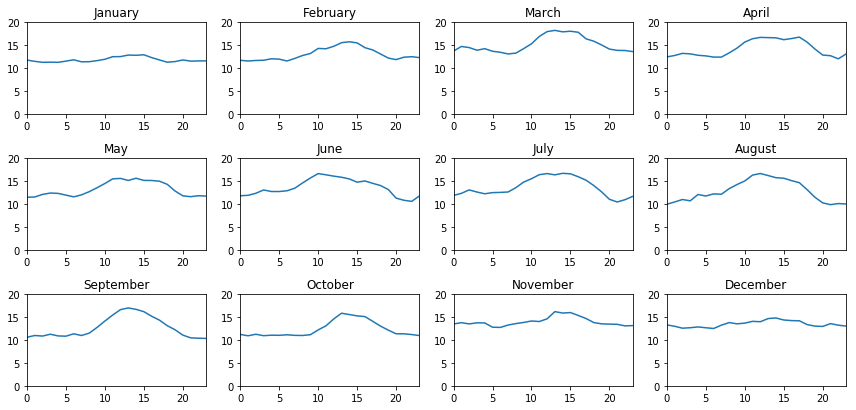

In [32]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(12,6))
plt.subplot(3,4,1)
for month in range(1,13):
    plt.subplot(3,4,month)
    weather[weather['Month'] == month].groupby('Hour')['wind_speed'].mean().plot()
    plt.tight_layout()
    plt.title(months[month - 1]),plt.xlabel(''),plt.ylim([0,20])

## Vancouver Crime Data

In [34]:
crime = pd.read_csv("http://www.math.ubc.ca/~pwalls/data/van_crime.csv")

In [35]:
crime.head()

,TYPE,YEAR,MONTH,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Mischief,2015,3,26XX E 49TH AVE,Victoria-Fraserview,496065.581256,5.452452e+06
1,Theft from Vehicle,2015,12,34XX WILLIAM ST,Hastings-Sunrise,497850.800800,5.457933e+06
2,Theft from Vehicle,2015,4,34XX WILLIAM ST,Hastings-Sunrise,497879.450446,5.457923e+06
3,Theft from Vehicle,2015,10,34XX WILLIAM ST,Hastings-Sunrise,497901.623450,5.457932e+06
4,Theft from Vehicle,2015,9,34XX WILLIAM ST,Hastings-Sunrise,497921.510576,5.457932e+06


In [36]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45802 entries, 0 to 45801
Data columns (total 7 columns):
TYPE             45802 non-null object
YEAR             45802 non-null int64
MONTH            45802 non-null int64
HUNDRED_BLOCK    45802 non-null object
NEIGHBOURHOOD    41815 non-null object
X                45802 non-null float64
Y                45802 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.4+ MB


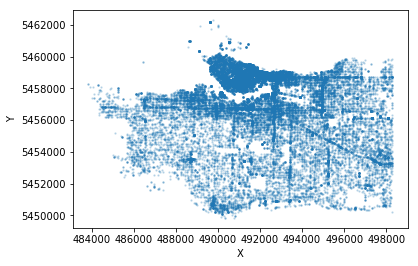

In [40]:
plt.figure(figsize=(12,12))
crime[crime['X'] > 0].plot(kind='scatter',x='X',y='Y',alpha=0.2,s=2)